  
# Keystroke analysis


#### IN791 presentation
#### Sohhom Bandyopadhyay (1551001)

#### Supervised By:   Prof Krishna Prasad Miyapuram

### 27 Nov 2018


### Name typing

#### Task
- Each participant typed their name 20 times
- Backspace and other edits were not allowed

#### Dendrogram from hierarchical clustering of name data
- Hierarchical clustering to reveal the patterns

In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as hc
from pyclustering.cluster.xmeans import xmeans
from chunk_utils import *
data_dir = './data/names'
image_dir = './images/'

In [2]:
# basic init
filenames = list(filter(lambda x: x.endswith('.kdt'), os.listdir(data_dir)))
matplotlib.rcParams['figure.figsize'] = 16,10
font = {'size': 16}
matplotlib.rc('font', **font)
%load_ext autoreload
%autoreload 2

In [3]:
with open(data_dir+'//'+filenames[2], 'r') as fh:
    mydata = fh.read()
typedname, rawkd = mydata.split('\n')
tt = typedname.replace(' ','_')
keypairs = list(map(lambda x: x[0]+x[1], zip(tt, tt[1:])))


raw_delays = kdata2delaysOLD(typedname, rawkd)
cumulative_delays = np.array([np.cumsum(delay1) for delay1 in raw_delays])


raw_delays = raw_delays.transpose()
cumulative_delays = cumulative_delays.transpose()

len(typedname), typedname, raw_delays.shape, cumulative_delays.shape

(20, 'sohhom bandyopadhyay', (19, 20), (19, 20))

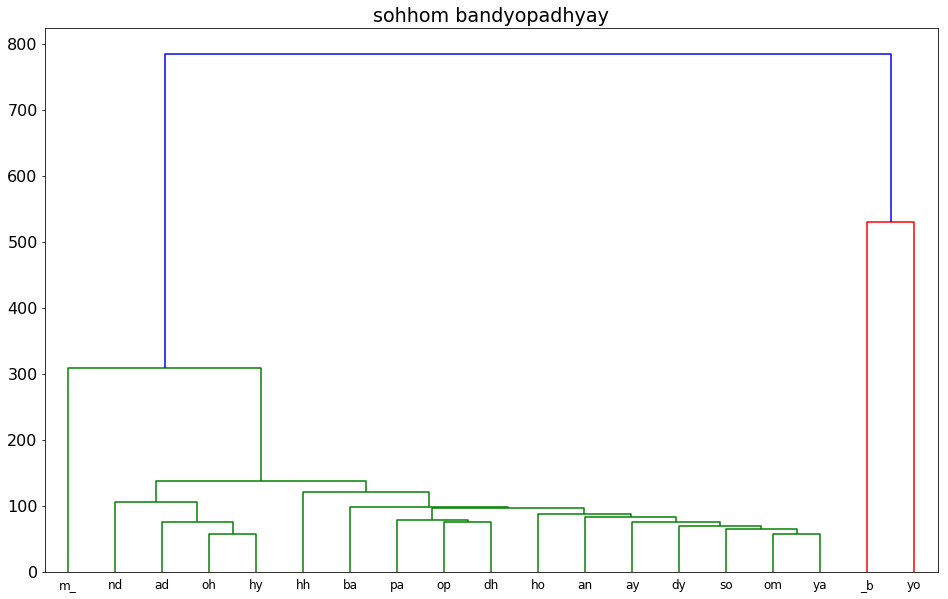

In [4]:
zz1 = hc.linkage(raw_delays,'single')
plt.title(typedname)
dn = hc.dendrogram(zz1, labels=keypairs)

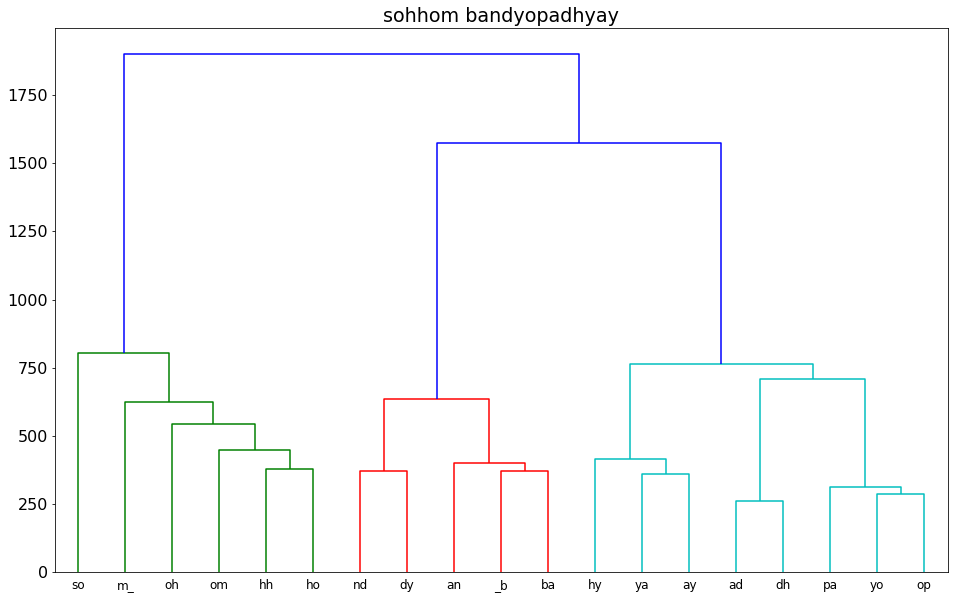

In [5]:
zz2 = hc.linkage(cumulative_delays,'single')
plt.title(typedname)
dn = hc.dendrogram(zz2, labels=keypairs)

In [6]:
clus = xmeans(cumulative_delays)
clus.process()
cluster_ids = clus.get_clusters()

In [7]:
len(cluster_ids)

8

In [8]:
cluster_ids

[[0, 1, 2, 3, 4, 5],
 [6, 7, 8],
 [9],
 [10],
 [11, 12, 13],
 [14],
 [15],
 [16, 17, 18]]

In [9]:
centers = clus.get_centers()